In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450,
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 
               1, 3, 3, 1, 2]], dtype = np.float64)
y = np.array([0, 0, 1, 0, 1,
              0, 1, 0, 1, 1], dtype = np.float64)

In [3]:
X

array([[1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 3.00e+00, 0.00e+00,
        5.00e+00, 1.00e+01, 1.00e+00, 2.00e+00],
       [5.00e+02, 7.00e+02, 7.50e+02, 6.00e+02, 1.45e+03, 8.00e+02,
        1.50e+03, 2.00e+03, 4.50e+02, 1.00e+03],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        3.00e+00, 3.00e+00, 1.00e+00, 2.00e+00]])

In [4]:
y

array([0., 0., 1., 0., 1., 0., 1., 0., 1., 1.])

In [5]:
def calc_std_feat(x):
    res = (x - x.mean()) / x.std()
    return res

In [6]:
X_st = X.copy()
X_st[2, :] = calc_std_feat(X[2, :])

In [7]:
X_st

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [ 1.        ,  1.        ,  2.        ,  1.        ,  3.        ,
         0.        ,  5.        , 10.        ,  1.        ,  2.        ],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [ 1.        ,  1.        ,  2.        ,  1.        ,  2.        ,
         1.        ,  3.        ,  3.        ,  1.        ,  2.        ]])

In [8]:
def calc_logloss(y, y_pred):
    err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
    err = np.sum(err)
    return err

In [9]:
# Пример применения
y1 = np.array([1, 0])
y_pred1 = np.array([0.9, 0.1])
calc_logloss(y1, y_pred1)

0.10536051565782628

In [10]:
def sigmoid(z):
    res = 1 / (1 + np.exp(-z))
    return res

In [11]:
z = np.linspace(-10, 10, 101)

In [12]:
probabilities = sigmoid(z)

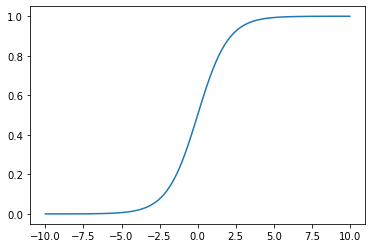

In [13]:
plt.plot(z, probabilities)

In [14]:
### Logistic Regression

In [15]:
def eval_model(X, y, iterations, alpha=1e-4):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        W -= alpha * (1/n * np.dot((y_pred - y), X.T))
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [16]:
W = eval_model(X_st, y, iterations=1000, alpha=1e-4)

100 [ 0.49282748 -0.15007528  0.64748973  1.51727915] 1.2014814214705334
200 [ 0.48896219 -0.16184918  0.64728128  1.51155738] 1.1828456288538924
300 [ 0.48511874 -0.17358386  0.64706349  1.50586552] 1.1643525542846556
400 [ 0.4812976  -0.18527698  0.64683669  1.50020462] 1.1460086359433084
500 [ 0.47749927 -0.19692597  0.64660127  1.4945758 ] 1.127820879406358
600 [ 0.47372426 -0.20852799  0.6463577   1.48898028] 1.109796908143704
700 [ 0.46997312 -0.22007992  0.6461065   1.48341934] 1.0919450148769096
800 [ 0.46624642 -0.23157833  0.64584825  1.47789438] 1.074274212586137
900 [ 0.46254476 -0.24301946  0.64558365  1.4724069 ] 1.0567942835649755
1000 [ 0.45886878 -0.25439917  0.64531344  1.46695851] 1.0395158244739489


## ДЗ к Урок 3. Логистическая регрессия. Log Loss

### 1. \* Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.  

In [58]:
def calc_logloss(y, y_pred):
#     err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
    err = np.zeros(y.shape)
    err[y == 0] = -(1.0 - y[y == 0]) * np.log(1.0 - y_pred[y == 0])
    err[y == 1] = -y[y == 1] * np.log(y_pred[y == 1])
    err = np.sum(err)
    return err

### 2. Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.

In [21]:
W = eval_model(X_st, y, iterations=100000, alpha=1e-4)

10000 [ 0.25808924 -0.68189547  0.68834749  1.2411954 ] 0.5906743816929662
20000 [ 0.14828711 -0.69312078  0.77938652  1.21304006] 0.5686161184060843
30000 [ 0.06280025 -0.6861144   0.85151403  1.21295529] 0.5559834472247203
40000 [-0.00866482 -0.68420916  0.90683954  1.22454952] 0.5476380224356814
50000 [-0.06996594 -0.6866606   0.94956256  1.24413705] 0.541644374202672
60000 [-0.12382407 -0.69204981  0.98292962  1.26931272] 0.5369564319716832
70000 [-0.17224326 -0.69935523  1.00931153  1.29828743] 0.5330172710285223
80000 [-0.21668343 -0.70786696  1.03042468  1.32975123] 0.5295310331283415
90000 [-0.25820024 -0.71709221  1.04751085  1.36276018] 0.5263390430000644
100000 [-0.29755454 -0.72668938  1.06147096  1.3966418 ] 0.5233543557317326


### 3. Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred_proba).

In [23]:
def calc_pred_proba(W, X):
    y_pred_proba = sigmoid(W @ X)
    return y_pred_proba

In [24]:
calc_pred_proba(W, X_st)

array([0.33907745, 0.44285205, 0.63409165, 0.38971708, 0.79502197,
       0.67172577, 0.80347923, 0.24402621, 0.31499672, 0.74971201])

### 4. Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred).

In [39]:
def calc_pred(W, X, p=0.5):
    y_pred = (sigmoid(W @ X) >= p).astype(np.float64)
    return y_pred

In [40]:
y

array([0., 0., 1., 0., 1., 0., 1., 0., 1., 1.])

In [41]:
calc_pred(W, X_st)

array([0., 0., 1., 0., 1., 1., 1., 0., 0., 1.])

### 5. Посчитайте Accuracy, матрицу ошибок, точность и полноту, а также F1 score.

In [67]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [68]:
confusion_matrix(y, calc_pred(W, X_st))

array([[4, 1],
       [1, 4]], dtype=int64)

In [69]:
accuracy_score(y, calc_pred(W, X_st))

0.8

In [70]:
precision_score(y, calc_pred(W, X_st))

0.8

In [71]:
recall_score(y, calc_pred(W, X_st))

0.8

In [72]:
f1_score(y, calc_pred(W, X_st))

0.8000000000000002

### 6. Могла ли модель переобучиться? Почему?

Переобучится модель может при большом количестве итерации и/или маленьком шаге (попадает в локальный минимум ошибки), а также потому что мало данных, поэтому необходимо применять регуляризацию, чтобы избежать переобучения.

### 7. \* Создайте функции eval_model_l1 и eval_model_l2 с применением L1 и L2 регуляризаций соответственно.

In [50]:
def eval_model_l1(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * np.sign(W))
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [51]:
W = eval_model_l1(X_st, y, iterations=100000, alpha=1e-4, lambda_=1e-4)

10000 [ 0.14819204 -0.69303877  0.7792821   1.21294592] 0.5686158421942522
20000 [-0.00882555 -0.68406015  0.90662191  1.2243826 ] 0.5476414253755991
30000 [-0.12387851 -0.69186544  0.98261253  1.26905905] 0.5369715876697072
40000 [-0.21664833 -0.70764653  1.03003234  1.32940221] 0.5295535670081797
50000 [-0.29743899 -0.72643238  1.06101896  1.39619578] 0.5233825326979936
60000 [-0.37162292 -0.74583772  1.08196487  1.46472619] 0.5178622100805663
70000 [-0.44198939 -0.76474113  1.09630824  1.53268284] 0.5127856005045197
80000 [-0.50999495 -0.78264546  1.10596446  1.59899281] 0.5080586583293926
90000 [-0.57640875 -0.79936224  1.11205355  1.66321002] 0.5036246249435725
100000 [-0.64164357 -0.81485409  1.11527179  1.72520107] 0.49944229913895677


In [52]:
y

array([0., 0., 1., 0., 1., 0., 1., 0., 1., 1.])

In [53]:
calc_pred(W, X_st)

array([0., 0., 1., 0., 1., 1., 1., 0., 0., 1.])

In [54]:
def eval_model_l2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * W) 
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [55]:
W = eval_model_l2(X_st, y, iterations=100000, alpha=1e-4, lambda_=1e-4)

10000 [ 0.14826705 -0.69305412  0.779317    1.21292661] 0.5686200275705369
20000 [-0.00867653 -0.68408596  0.90668198  1.2243409 ] 0.5476489873936693
30000 [-0.12381364 -0.69187709  0.9826814   1.26901385] 0.5369740116439106
40000 [-0.21664272 -0.7076468   1.03008985  1.32936226] 0.5295540094738425
50000 [-0.29747759 -0.72642293  1.06105564  1.39616075] 0.5233818719904872
60000 [-0.37169508 -0.74581847  1.08197659  1.46469245] 0.5178608534729323
70000 [-0.44208654 -0.76471138  1.09629356  1.53264552] 0.5127838639348757
80000 [-0.51010955 -0.78260437  1.10592333  1.59894672] 0.5080568340244226
90000 [-0.57653378 -0.79930903  1.11198675  1.66315007] 0.5036229893665064
100000 [-0.64177233 -0.81478811  1.11518059  1.7251224 ] 0.4994411129086325


In [56]:
y

array([0., 0., 1., 0., 1., 0., 1., 0., 1., 1.])

In [57]:
calc_pred(W, X_st)

array([0., 0., 1., 0., 1., 1., 1., 0., 0., 1.])